In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import statistics
import time


from TREE4.TREE4 import *


In [27]:
#importing carseat dataset, have split 280 / 120

train = pd.read_csv("Carseats_train.csv")
test = pd.read_csv("Carseats_test.csv")

print(train.shape)

high_train = []

for i in range(train.shape[0]):
    if train["Sales"][i] > 8:
        high_train.append("Yes")
    else:
        high_train.append("No")

train["High"] = high_train
del train["Sales"]
#del train["Unnamed: 0"]

high_test = []

for i in range(test.shape[0]):
    if test["Sales"][i] > 8:
        high_test.append("Yes")
    else:
        high_test.append("No")

test["High"] = high_test
del test["Sales"]
#del test["Unnamed: 0"]

feature_var = "High"
num_var = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
cat_var = ["ShelveLoc", "Urban", "US", "High"]

train.head()

train["High"]

print(Counter(train["High"]))
Counter(train["High"]).most_common(1)[0][1]

y = train["High"]
print(len(y))
#train.drop(labels = "High", axis = 1, inplace = True)
cat_var = ["ShelveLoc", "Urban", "US"]

(280, 11)
Counter({'No': 169, 'Yes': 111})
280


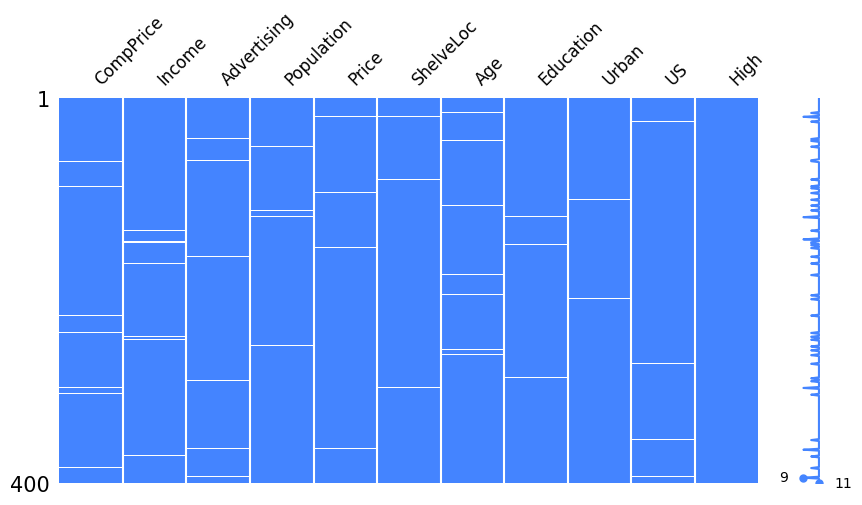

In [6]:
df = pd.concat([train, test], axis = 0)
df.reset_index(drop = True, inplace = True)

df_complete = df.copy()

import random
random.seed(142)
missing_values = 50
#10 columns, not the feature variable 
vars = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc", "Urban", "US"]

#vars = ["CompPrice", "Income", "ShelveLoc", "Urban"]

var_list = []
row_list = []
for i in range(missing_values):
    var_list.append( random.choice(vars)  )
    row_list.append( random.choice(range(0,400))  )


#impute missing values
for i in range(missing_values):
    df.loc[row_list[i], var_list[i]] = np.nan

import missingno
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


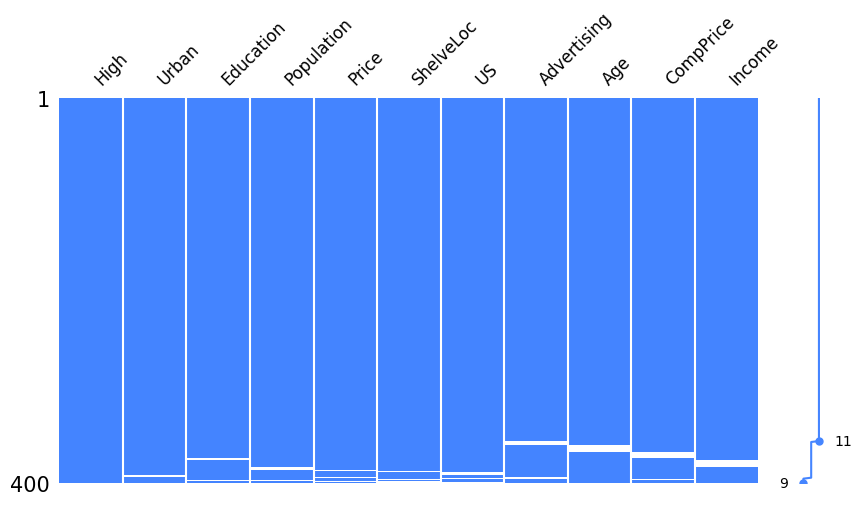

In [28]:
pd.options.mode.chained_assignment = None

bin_var = ["Urban", "US", "High"]
class_var = ["ShelveLoc"]

binpi = BINPI(df, num_var, bin_var, class_var, weak_learners = 7)

df2 = binpi.lexicographical_matrix()

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


In [8]:
df_binpi = binpi.binpi_imputation( )


Feature Variable:  Advertising 
Missing Values:  50

Iteration 1
Split Found:  n1 [['US', 'No', 0.4588800450037943, 0]] start <TREE4.TREE4.NodeClass object at 0x000002B56C5CFC80> US in 'No'
node_proportion_total  0.45888004500379315
training mse 23.82

Iteration 2
Split Found:  n1 [['US', 'No', 0.5205779703252944, 0]] start <TREE4.TREE4.NodeClass object at 0x000002B56E68B170> US in 'No'
node_proportion_total  0.5205779703252956
training mse 21.31

Iteration 3
Split Found:  n1 [['US', 'No', 0.48698606104921416, 0]] start <TREE4.TREE4.NodeClass object at 0x000002B56E6EA150> US in 'No'
node_proportion_total  0.486986061049213
training mse 22.5

Iteration 4
Split Found:  n1 [['US', 'No', 0.5210583135316236, 0]] start <TREE4.TREE4.NodeClass object at 0x000002B56E756FC0> US in 'No'
node_proportion_total  0.5210583135316227
training mse 21.39

Iteration 5
Split Found:  n1 [['US', 'No', 0.5586361235445554, 0]] start <TREE4.TREE4.NodeClass object at 0x000002B56E7B2990> US in 'No'
node_proporti

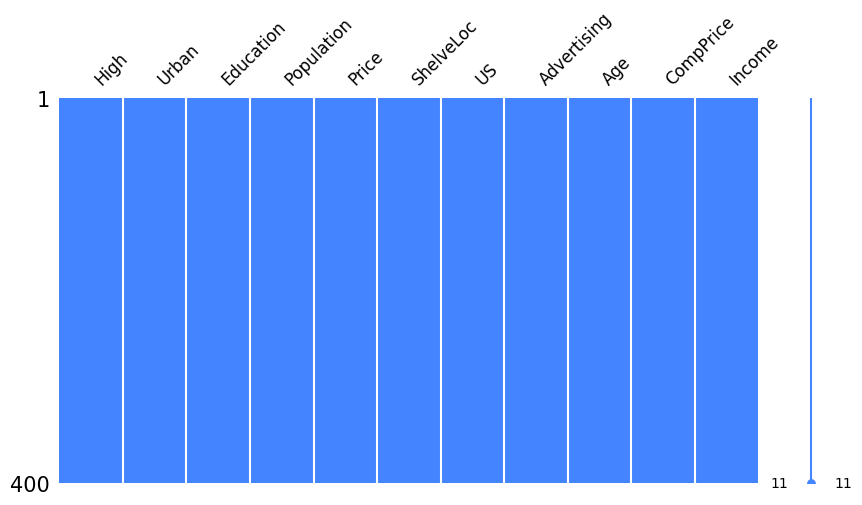

In [9]:
missingno.matrix(df_binpi, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


In [29]:
predicted = []
real = []
predictors = []
for i in range(missing_values):
    #print(df_binpi.loc[row_list[i], var_list[i]], df_complete.loc[row_list[i], var_list[i]])
    predicted.append(df_binpi.loc[row_list[i], var_list[i]])
    real.append(df_complete.loc[row_list[i], var_list[i]])
    predictors.append(var_list[i])

df_result_binpi = pd.DataFrame(
    {'Predictor':predictors,
     'Real Value': real,
     'Predicted Value BINPI': predicted
    })

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

df_result_binpi.style.hide()

In [12]:
missclass_binpi = 0 
total = 0
for i in range(missing_values):
    if df_result_binpi.loc[i, "Predictor"] in cat_var:
        total +=1
        if df_result_binpi.loc[i, "Real Value"] != df_result_binpi.loc[i, "Predicted Value BINPI"]:
            missclass_binpi += 1
print("missing values: ",missclass_binpi, "Out of a total of: ",total)



#num_var

mse_binpi = 0
total = 0 

for i in range(missing_values):
    if df_result_binpi.loc[i, "Predictor"] in num_var:
        total +=1
        mse_binpi += (df_result_binpi.loc[i, "Real Value"] - df_result_binpi.loc[i, "Predicted Value BINPI"])**2

print("Average MSE from BINPI imputation: ",mse_binpi/total, "from a total of: ",total)


missing values:  2 Out of a total of:  11
Average MSE from BINPI imputation:  1261.7987225871243 from a total of:  39


Sklearn Comparison

Sklearn uses 50 estimators though, but for time reasons this will be compared with 7 

resetting df2, as it is what is returned from the impuattion 

Include imputation_process_sklearn function from before (datamining)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

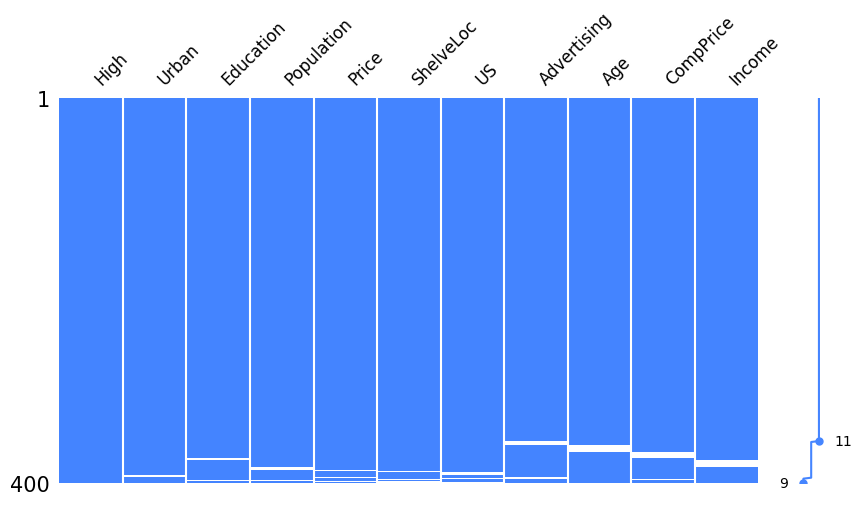

In [14]:
binpi = BINPI(df, num_var, bin_var, class_var, weak_learners = 7)
df2 = binpi.lexicographical_matrix()


missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

In [15]:
df2.isna().sum().sum()


50

In [17]:
#sklearn library requires converting categorical variabels to numerical 
df2.replace("Yes", 1, inplace = True)
df2.replace("No", 0, inplace = True)
df2.replace("Good", 3, inplace = True)
df2.replace("Medium", 2, inplace = True)
df2.replace("Bad", 1, inplace = True)

In [18]:
df_sklearn = binpi.binpi_imputation( sklearn = True)


Feature Variable:  Advertising 
Missing Values:  50
imp time 0.035927534103393555
time 0.0419316291809082

Feature Variable:  Advertising 
Missing Values:  49
imp time 0.0026369094848632812
time 0.00562739372253418

Feature Variable:  Advertising 
Missing Values:  48
imp time 0.0026574134826660156
time 0.007639884948730469

Feature Variable:  Advertising 
Missing Values:  47
imp time 0.001994609832763672
time 0.004988431930541992

Feature Variable:  Advertising 
Missing Values:  46
imp time 0.0015015602111816406
time 0.003485441207885742

Feature Variable:  Age 
Missing Values:  45
imp time 0.019032001495361328
time 0.02201986312866211

Feature Variable:  Age 
Missing Values:  44
imp time 0.0025191307067871094
time 0.0055124759674072266

Feature Variable:  Age 
Missing Values:  43
imp time 0.0019903182983398438
time 0.004065513610839844

Feature Variable:  Age 
Missing Values:  42
imp time 0.0019927024841308594
time 0.007489681243896484

Feature Variable:  Age 
Missing Values:  41
imp

Comparison

In [32]:
predicted = []
real = []
predictors = []
for i in range(missing_values):
    #print(df2.loc[row_list[i], var_list[i]], df_complete.loc[row_list[i], var_list[i]])
    predicted.append(df_sklearn.loc[row_list[i], var_list[i]])
    #real.append(df_complete.loc[row_list[i], var_list[i]])
    #predictors.append(var_list[i])

In [33]:
df_result_binpi["Predicted Value Sklearn"] = predicted

In [34]:
df_results2 = df_result_binpi.copy()

In [36]:
for i in range(missing_values):
    if df_results2.loc[i, "Predictor"] in ["US", "Urban"]:
        if df_results2.loc[i, "Predicted Value Sklearn"] == 0: 
            df_results2.loc[i, "Predicted Value Sklearn"] = "No"
        if df_results2.loc[i, "Predicted Value Sklearn"] == 1: 
            df_results2.loc[i, "Predicted Value Sklearn"] = "Yes"
    elif df_results2.loc[i, "Predictor"] in ["ShelveLoc"]:
        if df_results2.loc[i, "Predicted Value Sklearn"] == 1: 
            df_results2.loc[i, "Predicted Value Sklearn"] = "Bad"
        if df_results2.loc[i, "Predicted Value Sklearn"] == 2: 
            df_results2.loc[i, "Predicted Value Sklearn"] = "Medium"
        if df_results2.loc[i, "Predicted Value Sklearn"] == 3: 
            df_results2.loc[i, "Predicted Value Sklearn"] =  "Good"


In [37]:
df_results2.style.hide()

In [38]:
#cat_var = ["ShelveLoc", "Urban", "US"]

missclass_binpi = 0 
missclass_sklearn = 0 
total = 0
for i in range(missing_values):
    if df_results2.loc[i, "Predictor"] in cat_var:
        total +=1
        if df_results2.loc[i, "Real Value"] != df_results2.loc[i, "Predicted Value BINPI"]:
            missclass_binpi += 1
        if df_results2.loc[i, "Real Value"] != df_results2.loc[i, "Predicted Value Sklearn"]:
            missclass_sklearn += 1
missclass_binpi, missclass_sklearn, total

(2, 3, 11)

In [39]:
#num_var

mse_binpi = 0
mse_sklearn = 0 
total = 0 

for i in range(missing_values):
    if df_results2.loc[i, "Predictor"] in num_var:
        total +=1
        mse_binpi += (df_results2.loc[i, "Real Value"] - df_results2.loc[i, "Predicted Value BINPI"])**2
        #if df_results2.loc[i, "Real Value"] != df_results2.loc[i, "Predicted Value Sklearn"]:
        mse_sklearn += (df_results2.loc[i, "Real Value"] - df_results2.loc[i, "Predicted Value Sklearn"])**2

        print("real", df_results2.loc[i, "Real Value"], "pred cartplus", df_results2.loc[i, "Predicted Value BINPI"], "mse1", (df_results2.loc[i, "Real Value"] - df_results2.loc[i, "Predicted Value BINPI"])**2, "msetot", mse_binpi) 
        print("real", df_results2.loc[i, "Real Value"], "sklearn", df_results2.loc[i, "Predicted Value Sklearn"], "mse2", (df_results2.loc[i, "Real Value"] - df_results2.loc[i, "Predicted Value Sklearn"])**2 , "msetot2", mse_sklearn)
mse_binpi/total, mse_sklearn/total, total

real 80 pred cartplus 56.5440174604328 mse1 550.1831168964815 msetot 550.1831168964815
real 80 sklearn 50.850467289719624 mse2 849.6952572277056 msetot2 849.6952572277056
real 121 pred cartplus 117.11064673583445 mse1 15.127068813475216 msetot 565.3101857099567
real 121 sklearn 107.75 mse2 175.5625 msetot2 1025.2577572277055
real 120 pred cartplus 78.23463839838061 mse1 1744.3454297140233 msetot 2309.65561542398
real 120 sklearn 71.60526315789474 mse2 2342.05055401662 msetot2 3367.3083112443255
real 0 pred cartplus 0.607281521968049 mse1 0.36879084692382996 msetot 2310.024406270904
real 0 sklearn 0.3684210526315789 mse2 0.13573407202216065 msetot2 3367.444045316348
real 124 pred cartplus 116.412757681331 mse1 57.56624600220172 msetot 2367.5906522731057
real 124 sklearn 119.86666666666666 mse2 17.0844444444445 msetot2 3384.5284897607926
real 341 pred cartplus 359.30459172294906 mse1 335.0580781438551 msetot 2702.648730416961
real 341 sklearn 290.5 mse2 2550.25 msetot2 5934.778489760793


(1261.7987225871243, 2683.810189851849, 39)